<a href="https://colab.research.google.com/github/gheniabla/GenAI-Systems/blob/main/02_llm_sentiment_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LLM - A Sentiment Classifier**

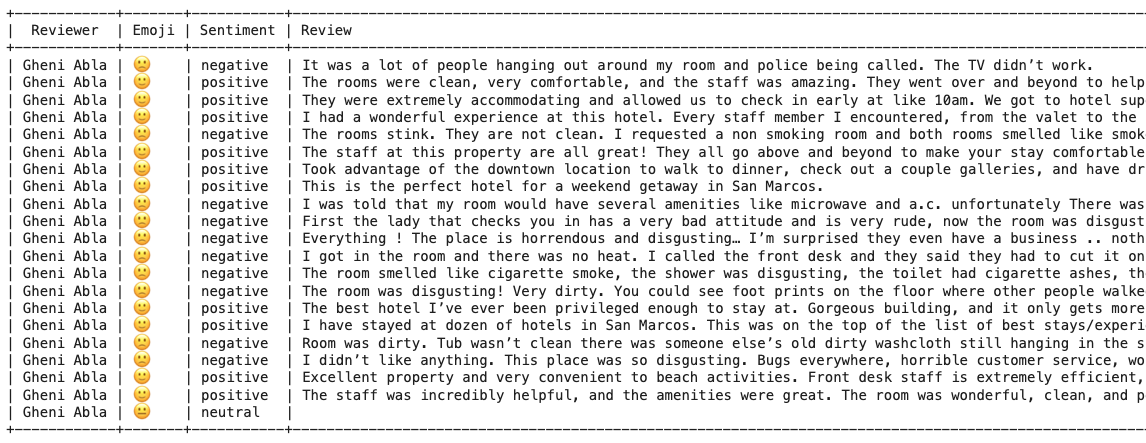

Large Language Models (LLMs) have demonstrated strong capabilities in sentiment classification. This sample code demonstrates how to classify hotel customer reviews using the Mistral API.
When making multiple consecutive API requests, the Mistral API may return a rate limit error:

SDKError: API error occurred: Status 429
{"message":"Requests rate limit exceeded"}

To address this rate limiting, we implement a five-second delay between requests.

The code also uses the prettytable and textwrap libraries to format the results in a clear, readable table format.





In [17]:
#Install mistralai API client
! pip install mistralai

In [18]:
#Retrive mistral API key stored in Google Colab Secrets
from google.colab import userdata
#my mistral.ai API key is named "mistral-api-key" and stored in Google Colab secrets
api_key=userdata.get('mistral-api-key')

In [19]:
#Create mistral client
from mistralai import Mistral
model = "mistral-large-latest"
client = Mistral(api_key=api_key)


In [20]:
def get_response_to_prompt(prompt):
    response = client.chat.complete(
    model=model,
    messages=[
        {"role": "system", "content": """You are a helpful reviewer. Please return following one of three answers only: Happy face emoji '🙂:positive' if positive , neutral face emoji '😐:neutral' if neutral, and sad face emoji '🙁:negative' if negative':)', '', 'negative'"""},
        {"role": "user", "content": prompt},
    ],
    temperature=0,
)
    return response.choices[0].message.content

In [21]:
import urllib.request

url = "https://raw.githubusercontent.com/gheniabla/datasets/refs/heads/master/hotel-review.txt"

try:
    response = urllib.request.urlopen(url)
    data = response.read()

    # Decode the bytes to a string
    decoded_data = data.decode('utf-8')  # Assuming the data is UTF-8 encoded

    #print(decoded_data)

except urllib.error.URLError as e:
    print(f"Error: {e.reason}")

In [22]:
import time

responses =[]

for line in decoded_data.split('\n'):
    prompt = f"""Classify the test below, delimited by three dashes (-), as having either positive or negative

    ---
    {line}
    ---
    """
    response = get_response_to_prompt(prompt)
    answer = response + ":" + line
    #print(answer)
    responses.append(answer)
    time.sleep(5)

In [23]:
from prettytable import PrettyTable
import textwrap

table = PrettyTable()
table.field_names = ["Reviewer",  "Emoji", "Sentiment", "Review"]
for item in responses:
  if len(item) > 2:
    cols =   item.split(":")
    table.add_row(["Gheni Abla", cols[0], cols[1], cols[2] ])

# Wrap the text in the second column
table._max_width = {"Review": 100}
table._max_width = {"Sentiment": 10}

# Align the "Review" column to the left
table.align["Emoji"] = "l"
table.align["Sentiment"] = "l"
table.align["Review"] = "l"
print(table)

+------------+-------+-----------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|  Reviewer  | Emoji | Sentiment | Review                                                                                                                                                                                                                                                                                                                                                                                                                             